In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# import yellowbrick as yb
from matplotlib.colors import ListedColormap
# from yellowbrick.classifier import ROCAUC
import matplotlib.patches as mpatches



#reading data
data_metabric = pd.read_csv("Data/METABRIC_RNA_Mutation.csv", delimiter=',')
data_wisconsin = pd.read_csv("Data/data_Wisconsin.csv")

#preparing for corr
data_wisconsin.loc[data_wisconsin["diagnosis"] == "M", "diagnosis"] = 1
data_wisconsin.loc[data_wisconsin["diagnosis"] == "B", "diagnosis"] = 0
data_wisconsin["diagnosis"] = pd.to_numeric(data_wisconsin["diagnosis"])


#metabric to clinical and genes

clinical_df = data_metabric.drop(data_metabric.columns[31:], axis=1)


# dropping mutations
genetic_df = data_metabric.drop(data_metabric.columns[520:], axis=1)
# droping clinical data
genetic_df = genetic_df.drop(genetic_df.columns[4:35], axis=1)
genetic_df = genetic_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_df = genetic_df.iloc [:,:-174]
genetic_df['overall_survival']= data_metabric['overall_survival']

categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 

no_id_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns)


C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:

Corr_diagnosis = data_wisconsin.corr()['diagnosis'].sort_values(ascending = False)
Corr_wisconsin = pd.DataFrame({'Correlation':Corr_diagnosis})



Corr_survival = no_id_clinical_df.corr()['overall_survival'].sort_values(ascending = False)
Corr_clinical = pd.DataFrame({'Correlation':Corr_survival})
Corr_clinical.head(10)

#Corr_wisconsin.tail(5)


,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
type_of_breast_surgery_BREAST CONSERVING,0.187856
inferred_menopausal_state_Pre,0.170915
radio_therapy,0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif,0.094463
pam50_+_claudin-low_subtype_claudin-low,0.091397
integrative_cluster_10,0.076256
pam50_+_claudin-low_subtype_LumA,0.065186
3-gene_classifier_subtype_ER-/HER2-,0.065135


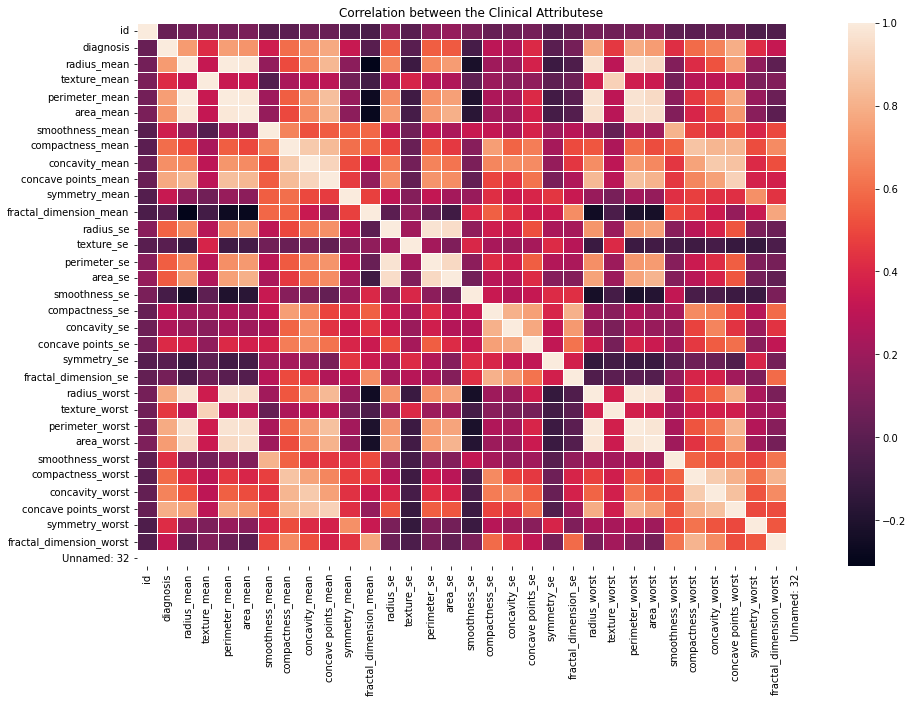

In [12]:
fig, axs = plt.subplots(figsize = (15, 10)) 


sns.heatmap(data_wisconsin.corr(), linewidths=.5, fmt= '.1f',ax=axs)
plt.title('Correlation between the Clinical Attributese')

plt.savefig('sample.png')
plt.show()

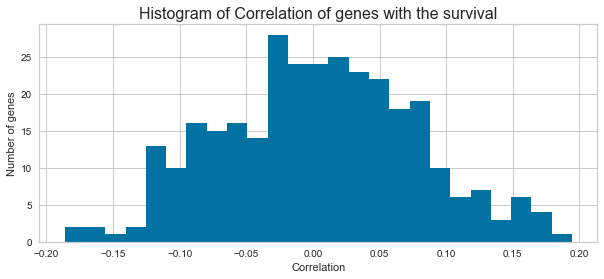

In [9]:
fig, ax = plt.subplots(figsize=(10,4))

corrs=[]
for col in genetic_df.drop(['patient_id'], axis = 1).columns:
    corr = genetic_df[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)

corrs.pop(-1)
ax.hist(corrs,  bins=25)
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)


plt.show()